In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv("ncr_ride_bookings.csv")
df.head

<bound method NDFrame.head of               Date      Time    Booking ID   Booking Status   Customer ID  \
0       2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1       2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2       2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3       2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4       2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   
...            ...       ...           ...              ...           ...   
149995  2024-11-11  19:34:01  "CNR6500631"        Completed  "CID4337371"   
149996  2024-11-24  15:55:09  "CNR2468611"        Completed  "CID2325623"   
149997  2024-09-18  10:55:15  "CNR6358306"        Completed  "CID9925486"   
149998  2024-10-05  07:53:34  "CNR3030099"        Completed  "CID9415487"   
149999  2024-03-10  15:38:03  "CNR3447390"        Completed  "CID4108667"   

         Vehicle Type         Pickup Location

In [23]:
df_cleaned = df.dropna(subset=['Booking Value', 'Ride Distance'])
df_cleaned['Booking Value'] = df_cleaned['Booking Value']/10

threshold = df_cleaned['Booking Value'].quantile(0.90)
df_filtered = df_cleaned[df_cleaned['Booking Value'] < threshold]

x = df_cleaned[['Ride Distance']]
y = df_cleaned['Booking Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 Score: -6.32425448592322e-05
Mean Squared Error: 1575.5919741729708


/var/folders/2j/xtwf217j69zd4c401c_dmb2c0000gn/T/ipykernel_80469/1159944449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Booking Value'] = df_cleaned['Booking Value']/10


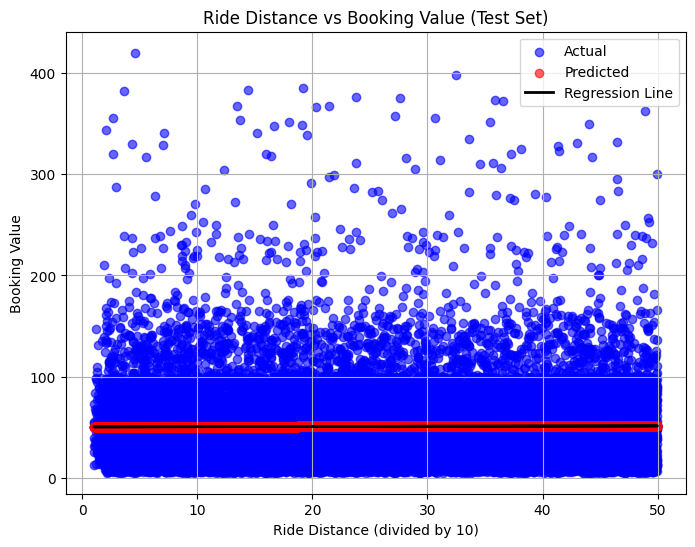

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression Line')

plt.title('Ride Distance vs Booking Value (Test Set)')
plt.xlabel('Ride Distance (divided by 10)')
plt.ylabel('Booking Value')
plt.legend()
plt.grid(True)
plt.show()
